# **1.** **Importing** & **Ploting** liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **1.1.** Setting style to **ggplot**

In [2]:
plt.style.use('ggplot')
%matplotlib inline

## **1.2.** Setting plot **Size**, **Font** & **Mode**

In [3]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font' , **font)
plt.rcParams['savefig.dpi'] = 480
plt.rcParams["figure.figsize"] = (40, 30)

# **2.** Importing Data to **DataFram**

In [4]:
train_df = pd.read_csv("./resources/originalData/train.csv")
train_df.drop(columns="ID",inplace=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

# **3.** Feature Engineering

## **3.1.** Standardization

In [6]:
standered_scaler = StandardScaler()
train_transformed = standered_scaler.fit_transform(train_df.drop(columns='y'))
# test_transformed = standered_scaler.transform(test_df)

In [7]:
col_list = train_df.columns.to_list()
col_list.remove('y')

In [8]:
train_transformed_y = pd.concat([pd.DataFrame(train_transformed,columns=col_list),train_df['y']],axis=1)

## **3.2.** PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca_x_data = pca.fit_transform(train_transformed)

<AxesSubplot:>

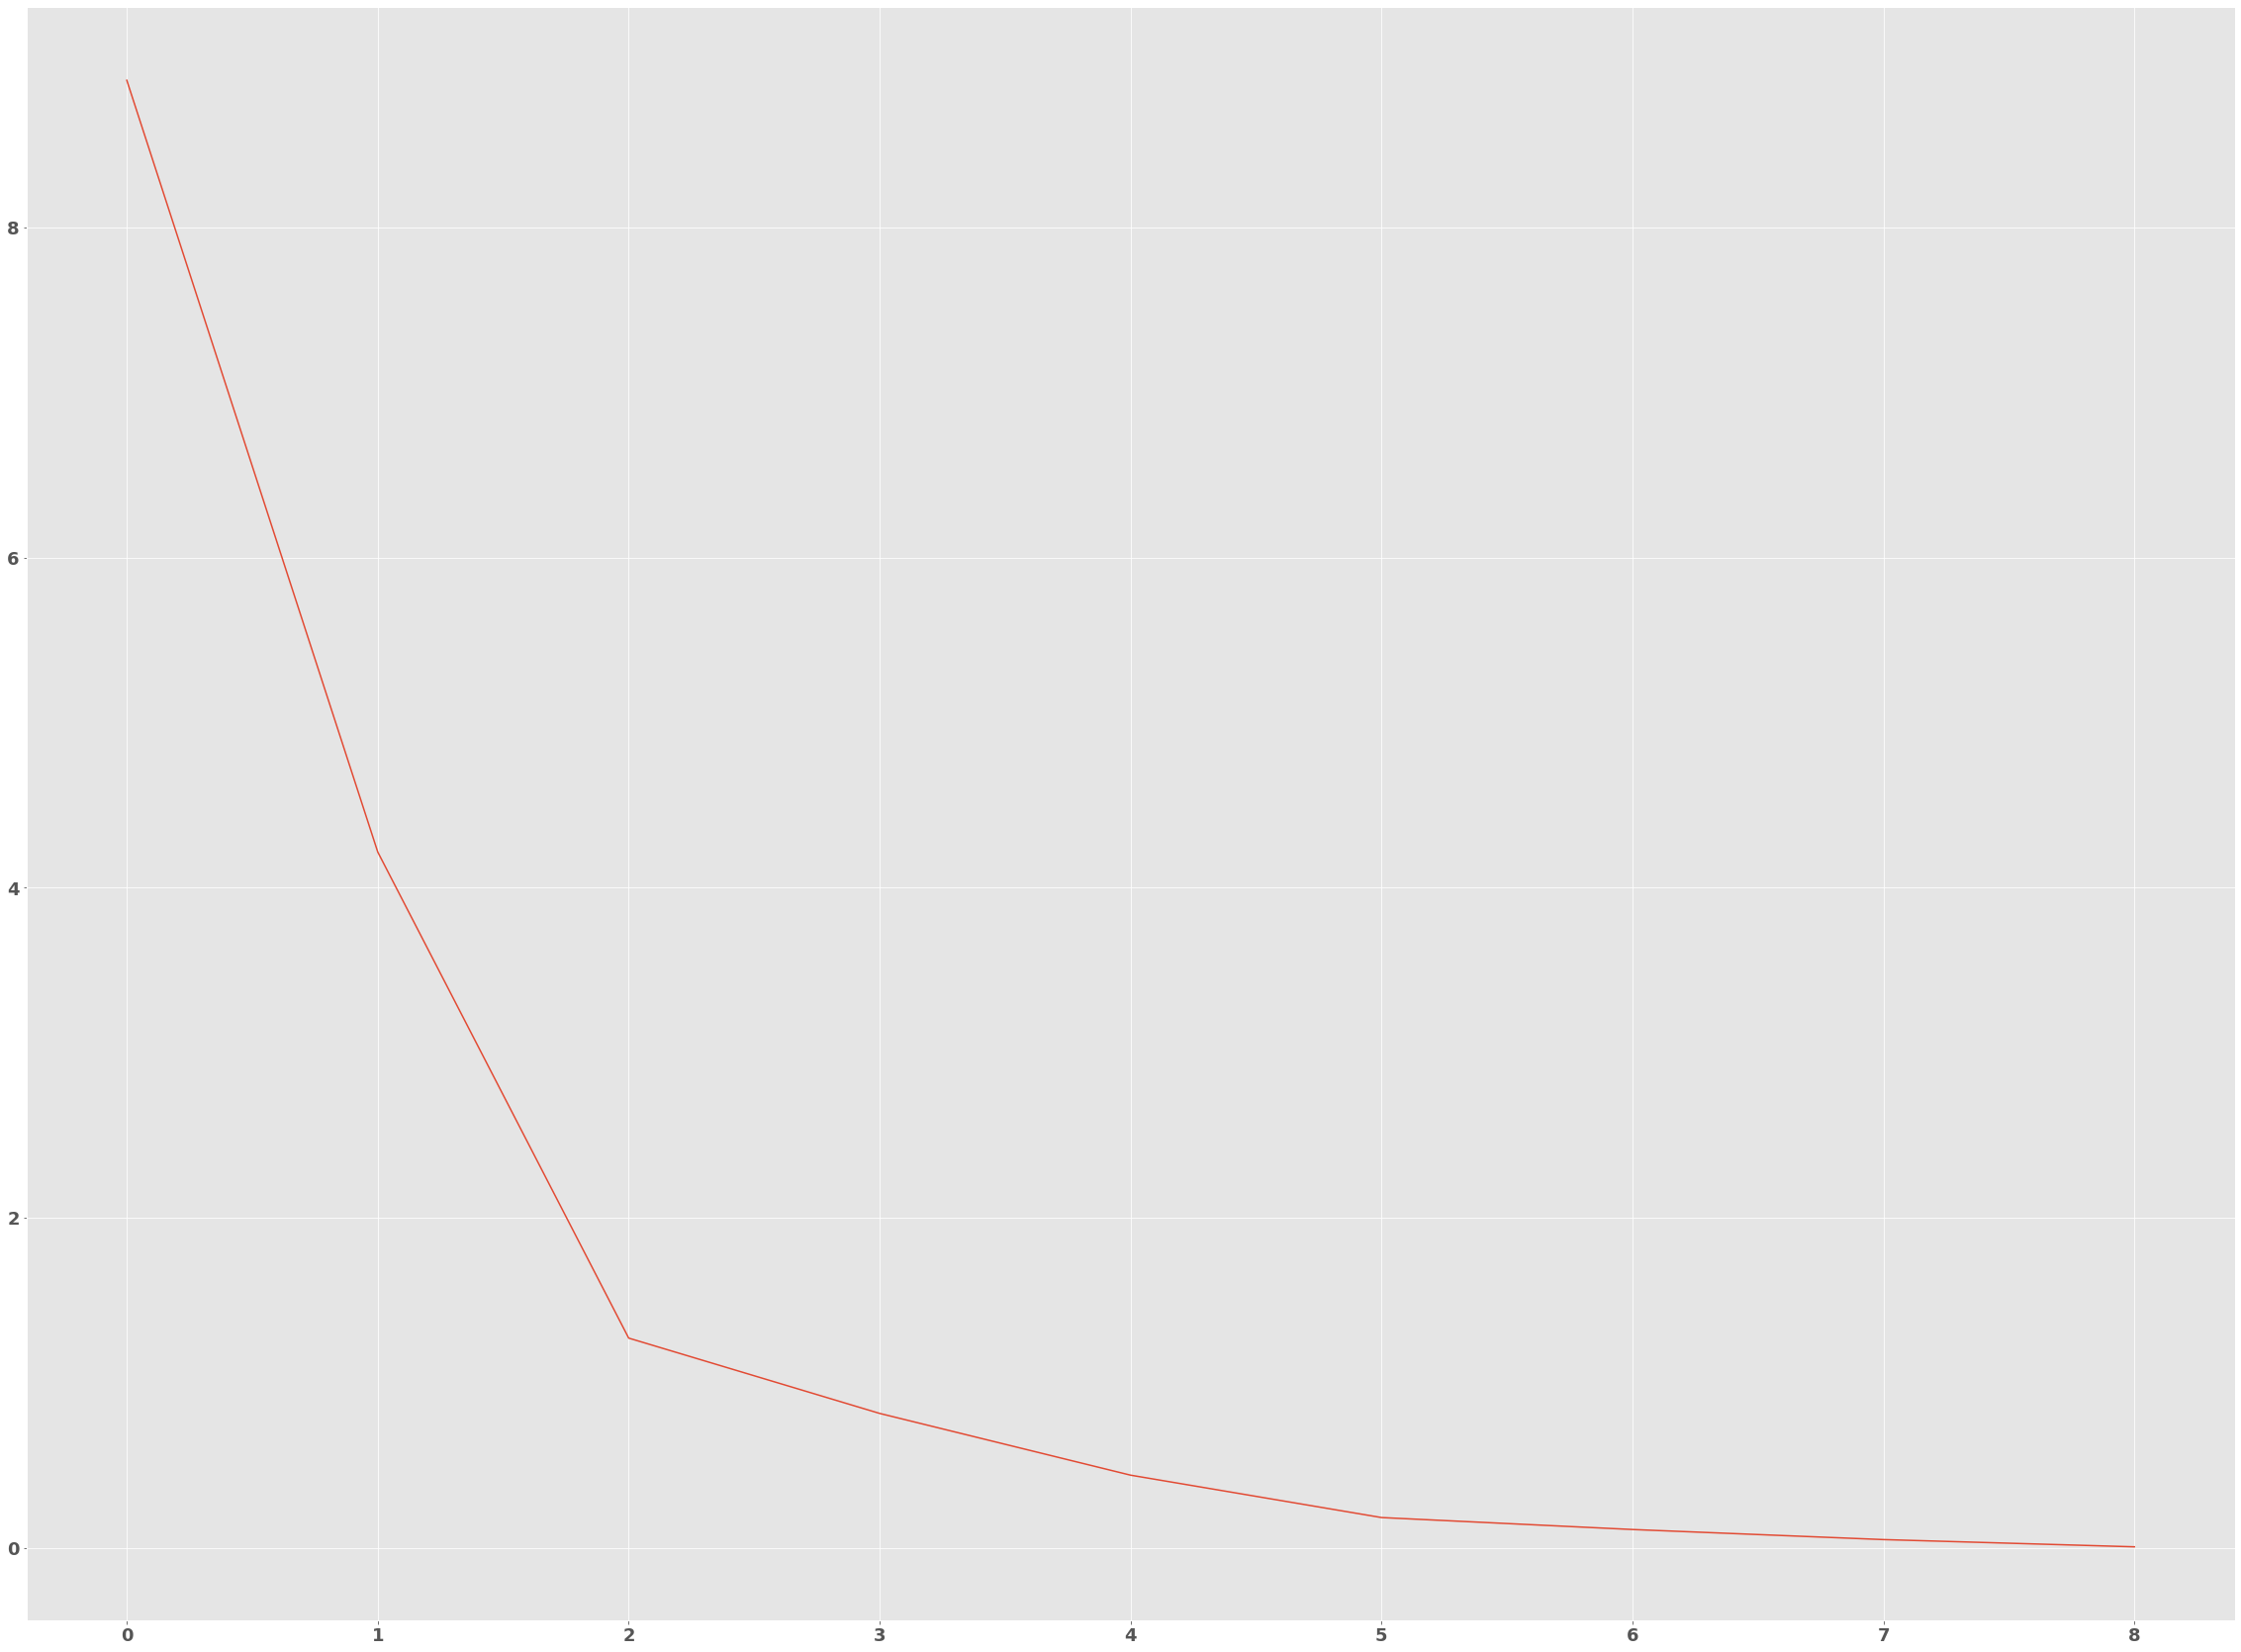

In [10]:
sns.lineplot(list(range(0,pca_x_data.shape[1])),pca.explained_variance_)

In [11]:
pca_df = pd.concat([pd.DataFrame(pca_x_data),train_df['y']],axis=1)

In [12]:
pca_df

,0,1,2,3,4,5,6,7,8,y
0,3.05,-3.35,-1.43,-2.40,0.64,0.09,0.19,-0.47,-0.05,HOROZ
1,-3.01,2.80,-0.47,-0.27,-0.69,-0.65,0.13,-0.04,0.07,SEKER
2,-2.94,0.02,-0.10,0.92,0.00,0.40,-0.12,-0.07,-0.05,DERMASON
3,-1.90,0.16,-0.48,0.10,0.35,0.12,-0.29,-0.03,-0.02,DERMASON
4,-1.26,0.16,0.01,-0.54,0.01,-0.16,-0.18,0.18,-0.01,SIRA
...,...,...,...,...,...,...,...,...,...,...
10829,-2.95,1.49,0.18,-0.09,0.05,-0.16,0.10,0.04,-0.05,SEKER
10830,-2.31,-0.87,-0.09,-0.30,-0.08,0.43,-0.18,0.02,-0.01,DERMASON
10831,3.30,0.51,-1.55,0.49,-0.23,-0.44,-0.03,-0.03,-0.13,CALI
10832,-0.12,-0.43,-0.10,-1.35,-0.53,-0.27,-0.35,0.14,0.01,SIRA


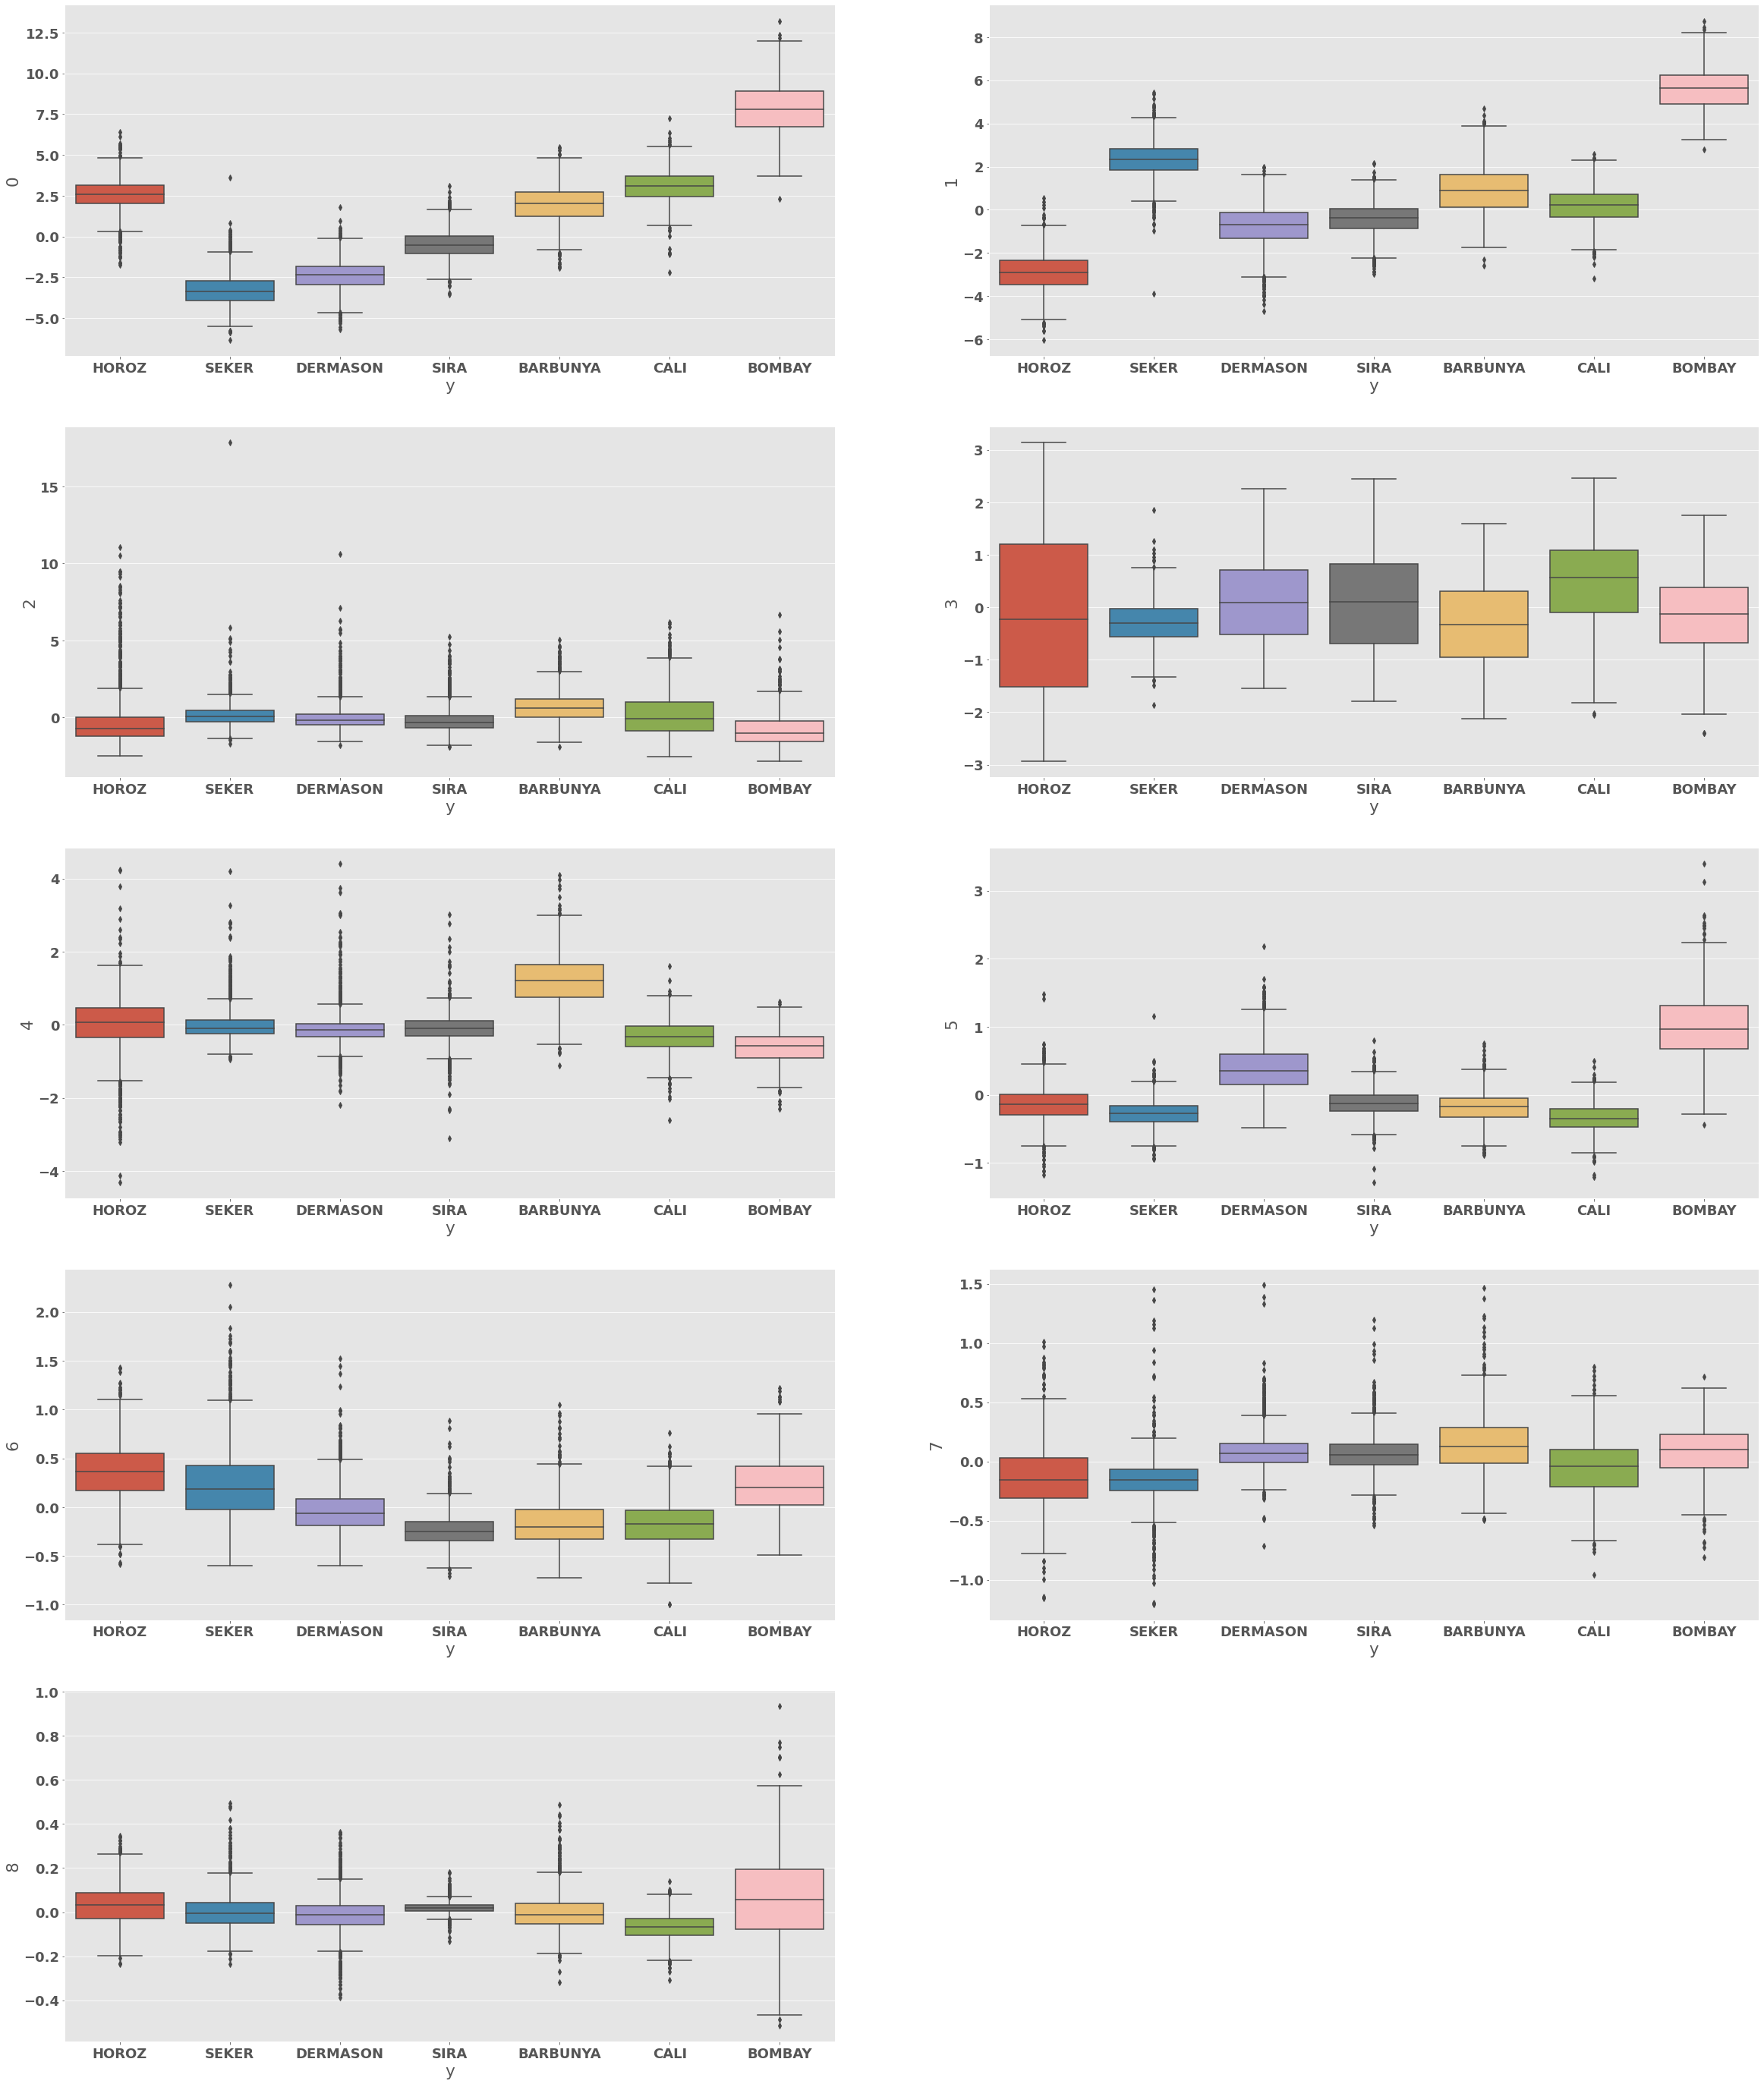

In [13]:
fig = plt.figure(figsize=[40,80])
for index,feature in enumerate(pca_df.columns.to_list()):
    if feature != 'y':
        ax = fig.add_subplot(8,2,index+1)
        sns.boxplot(data=pca_df,x="y",y=feature,ax=ax)

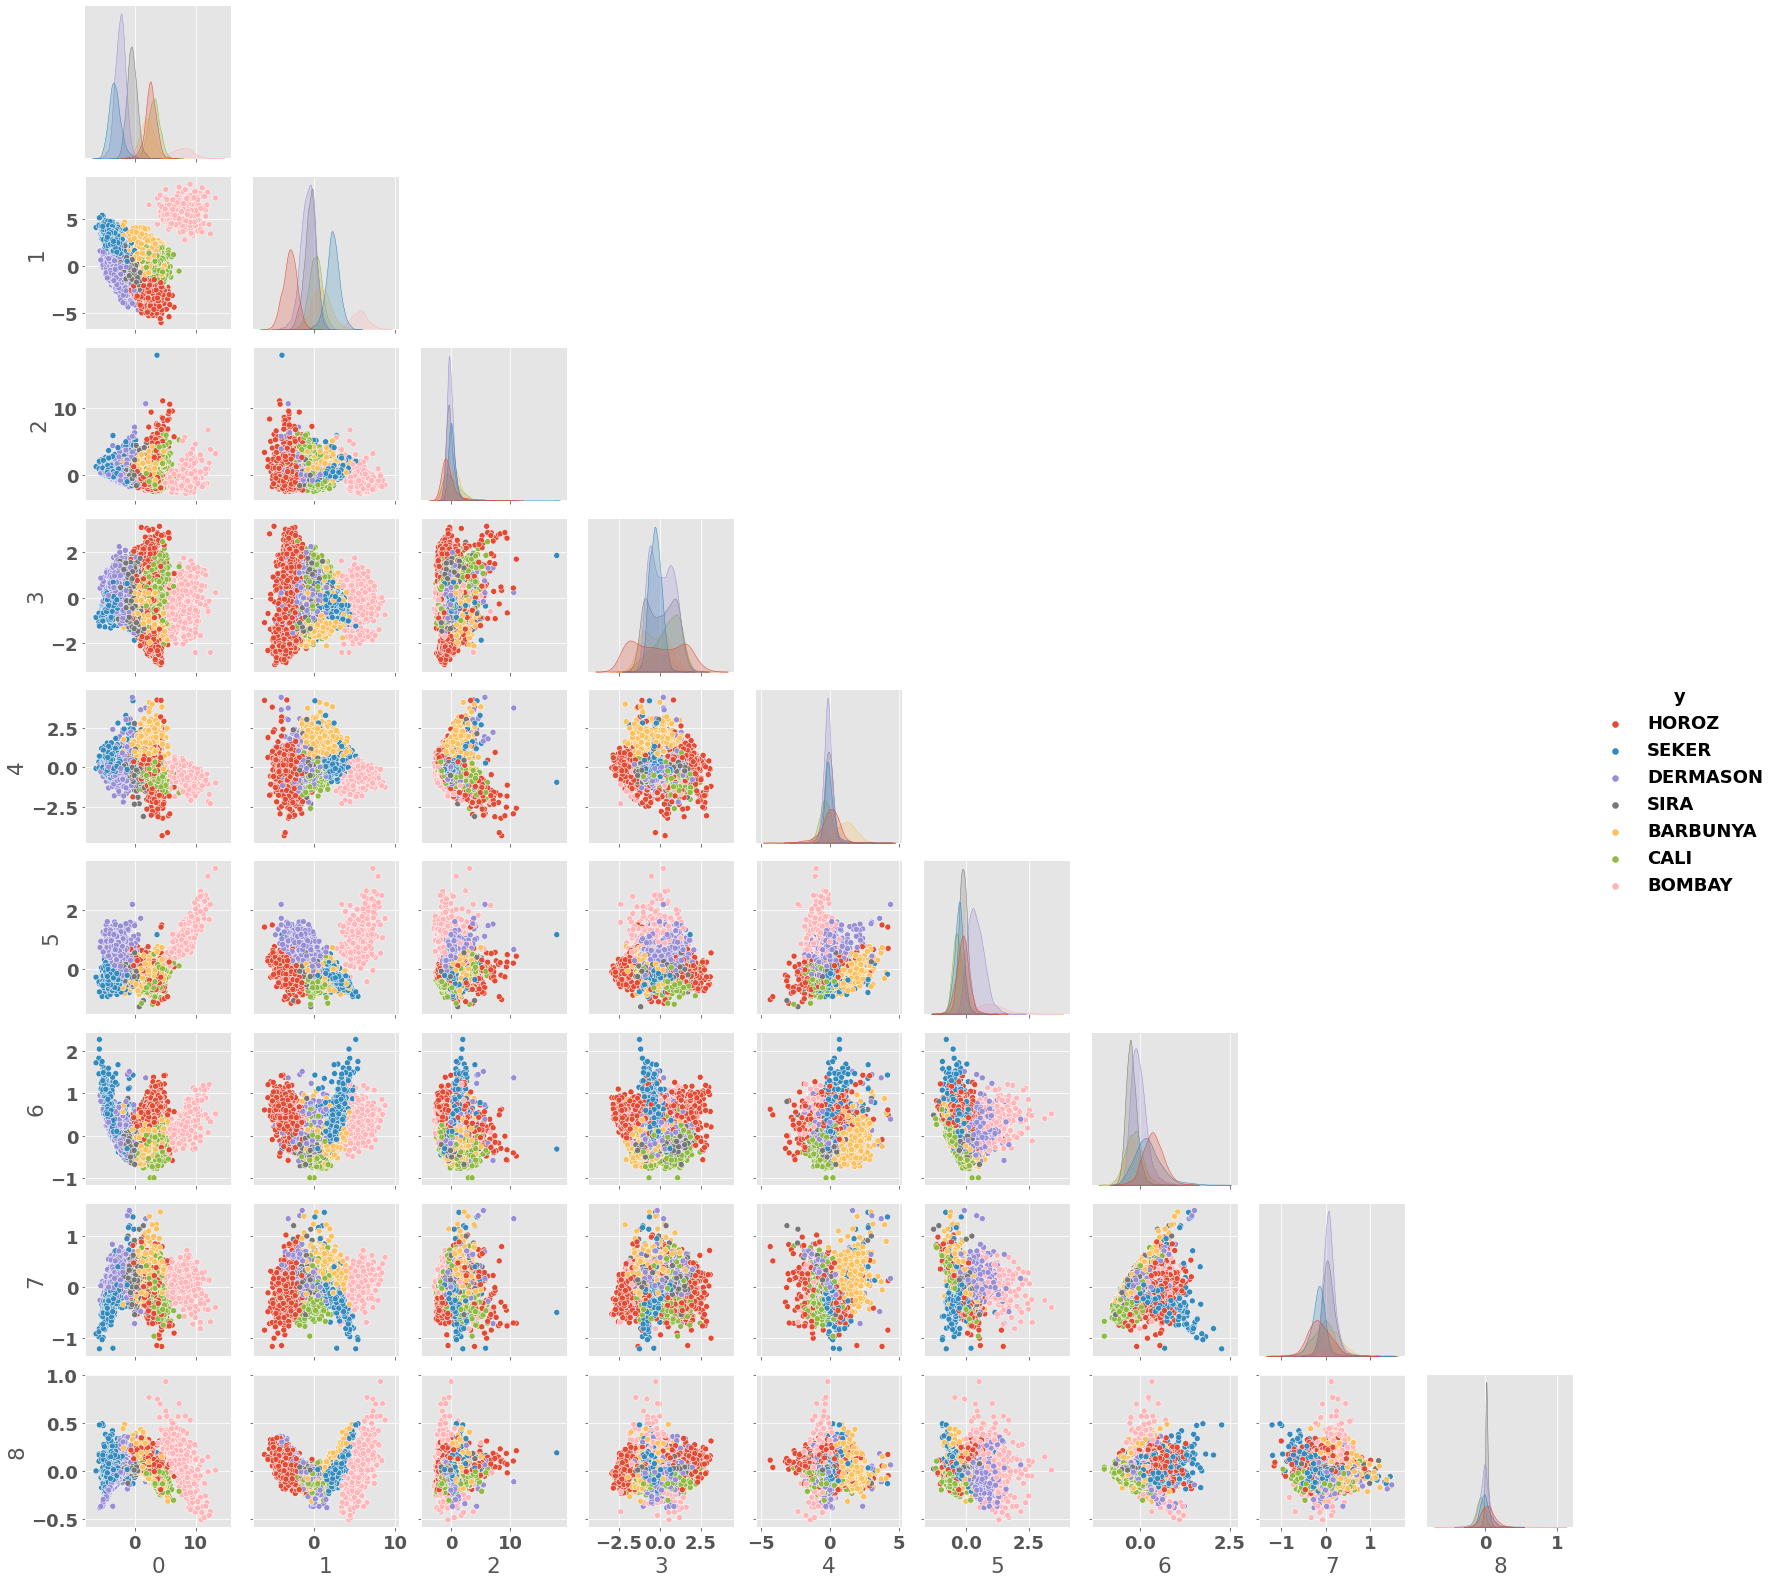

In [19]:
sns.pairplot(pca_df,corner=True,hue='y')

In [15]:
def lazy_pridict(X,Y,top_model_num=10):
    lazy_model = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
    x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state=42)
    _ ,test=lazy_model.fit(x_train,x_val,y_train,y_val)
    display(test.head(top_model_num))

In [16]:
lazy_pridict(pca_df.drop(columns=['y']),pca_df['y'])

100%|██████████| 29/29 [00:24<00:00,  1.20it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.93,0.94,None,0.93,2.19
ExtraTreesClassifier,0.93,0.94,None,0.93,0.73
LogisticRegression,0.93,0.94,None,0.93,0.46
SVC,0.93,0.94,None,0.93,0.68
XGBClassifier,0.93,0.94,None,0.93,4.38
LGBMClassifier,0.93,0.94,None,0.93,1.51
KNeighborsClassifier,0.93,0.93,None,0.93,0.21
CalibratedClassifierCV,0.92,0.93,None,0.92,2.21
BaggingClassifier,0.93,0.93,None,0.93,0.63


## **3.3.** T-SNE

In [72]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3,perplexity=200, learning_rate=500, n_iter=1000).fit_transform(train_transformed)

In [73]:
x_embedded_df = pd.DataFrame(X_embedded,columns=["x1","x2",'x3'])

<AxesSubplot:xlabel='x3', ylabel='x1'>

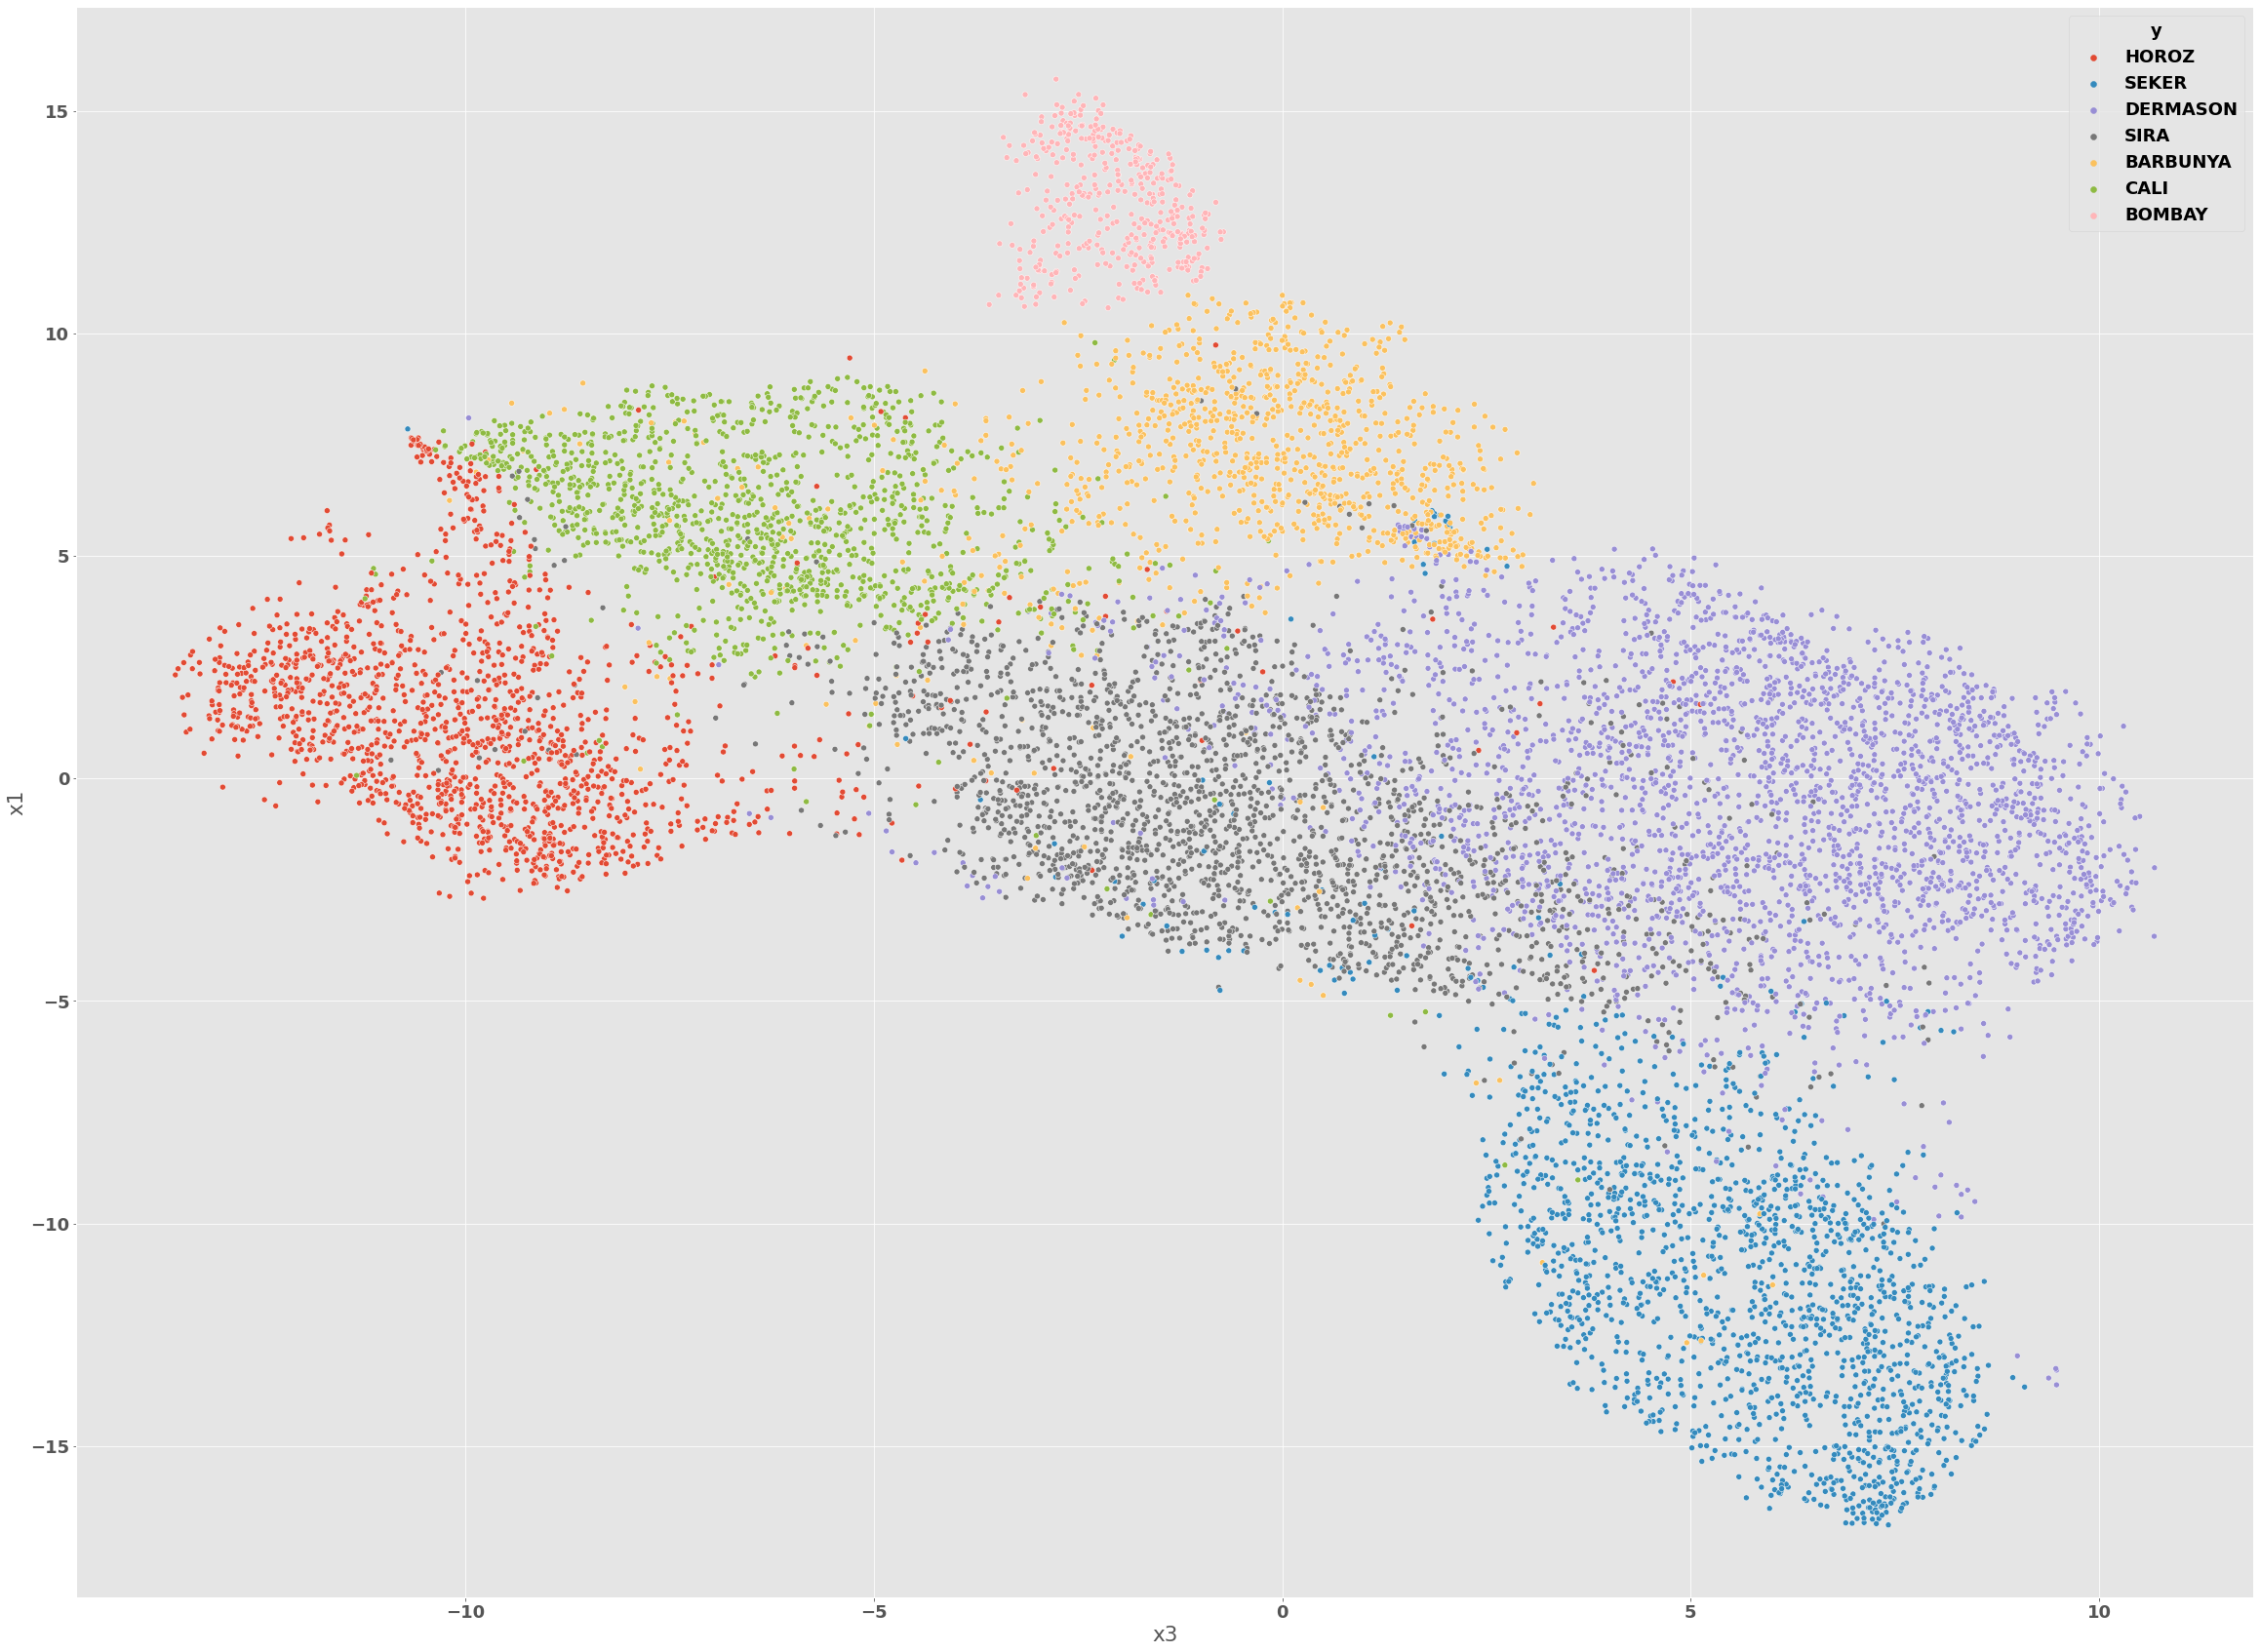

In [77]:
sns.scatterplot(data=x_embedded_df,x='x3',y='x1',hue=train_df['y'])

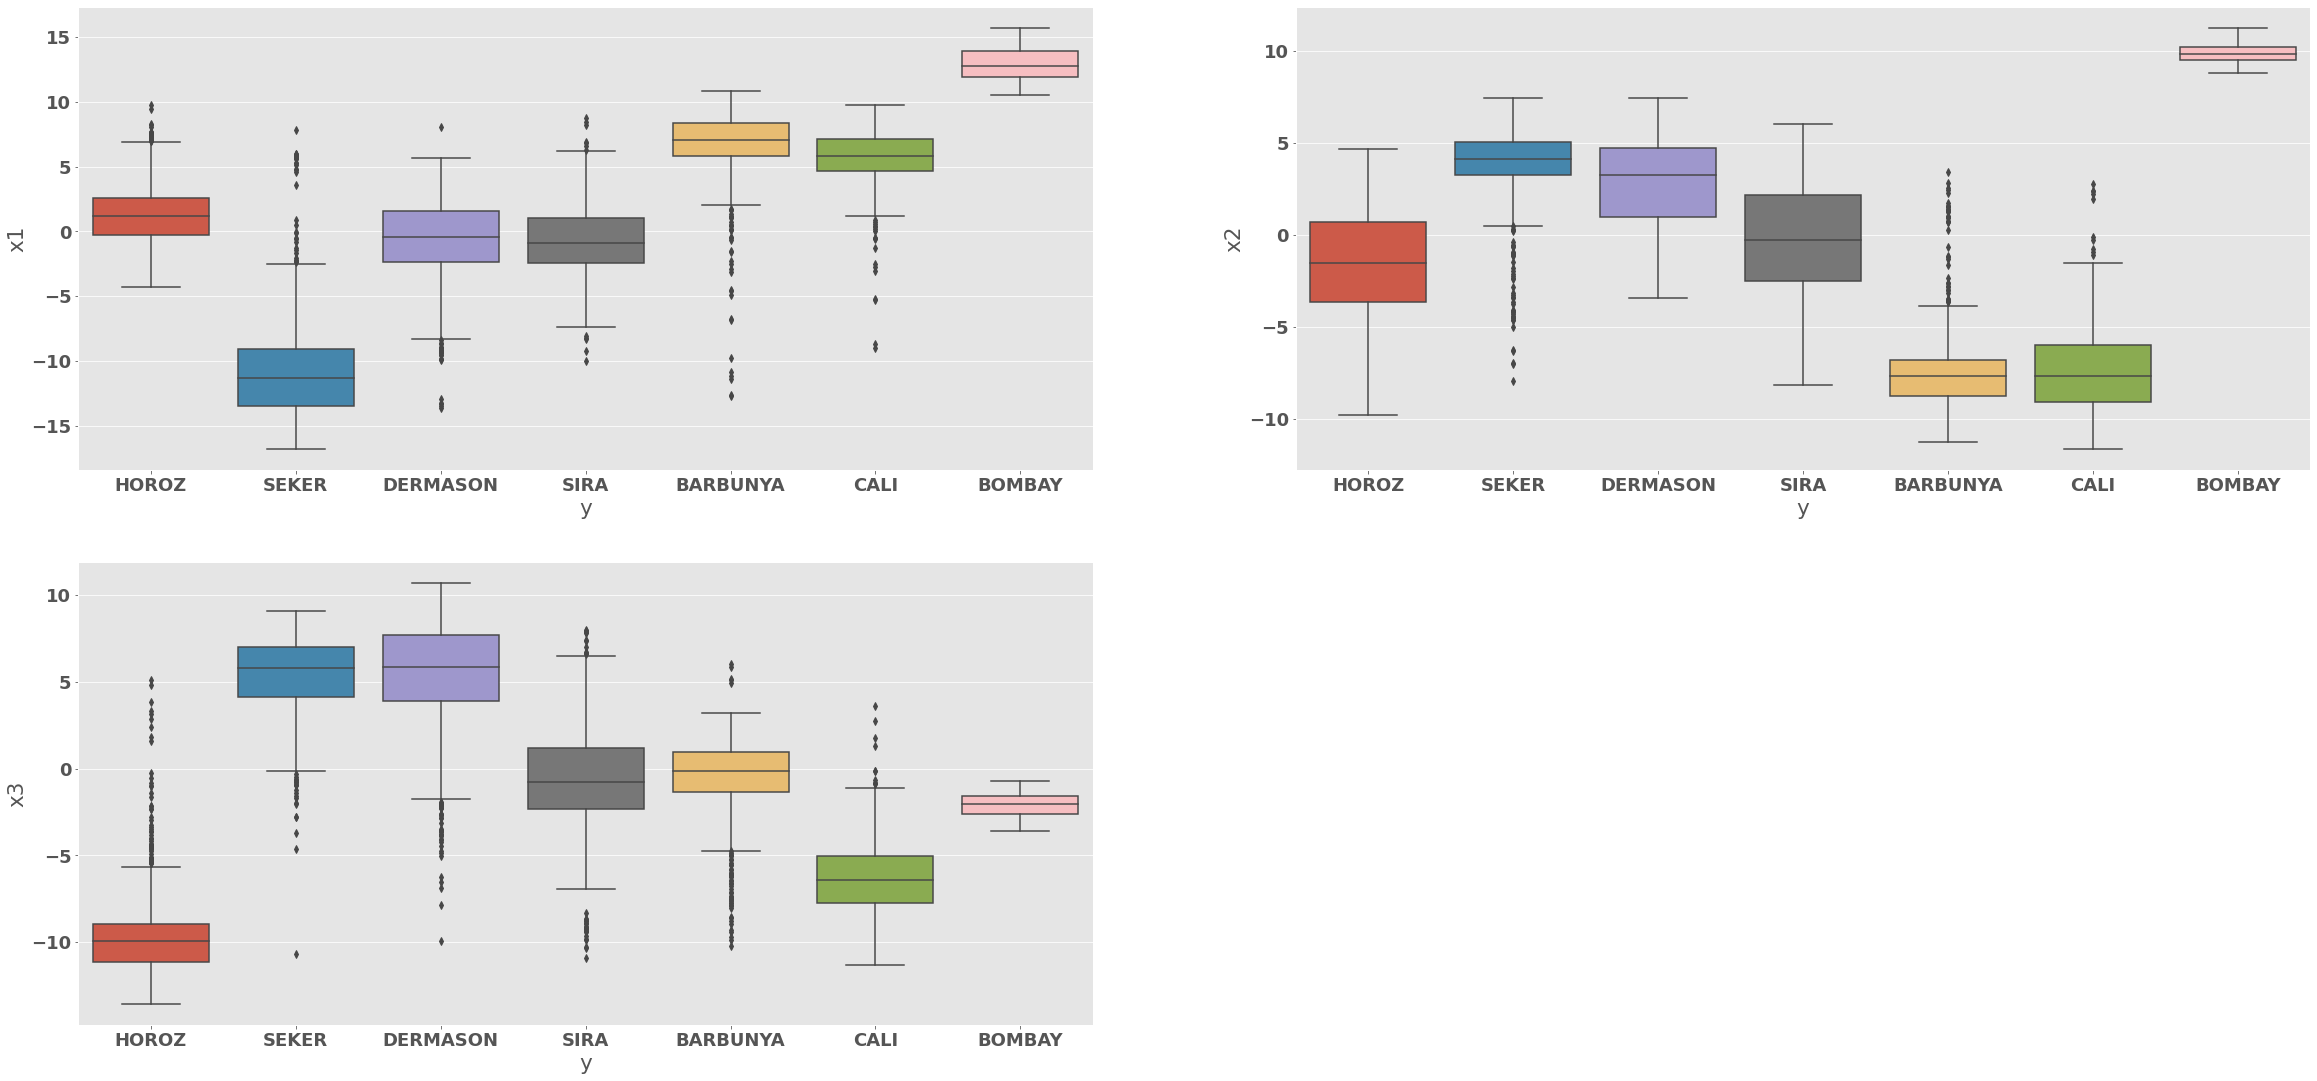

In [75]:
fig = plt.figure(figsize=[40,80])
for index,feature in enumerate(x_embedded_df.columns.to_list()):
    if feature != 'y':
        ax = fig.add_subplot(8,2,index+1)
        sns.boxplot(data=x_embedded_df,x=train_df['y'],y=feature,ax=ax)

In [78]:
x_embedded_df.to_csv("./resources/generatedData/t_sne.csv")

In [ ]:
pca_df.to_csv("./resources/generatedData/pca.csv")